In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import copy
import math

In [2]:
data = pd.read_csv('New_housePrice.csv')

In [3]:
print(data.head())

  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


In [4]:
data.shape

(3479, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [6]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [7]:
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Parking'] = label_encoder.fit_transform(data['Parking'])
data['Elevator'] = label_encoder.fit_transform(data['Elevator'])
data['Warehouse'] = label_encoder.fit_transform(data['Warehouse'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   int64  
 3   Warehouse   3479 non-null   int64  
 4   Elevator    3479 non-null   int64  
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 217.6+ KB


In [10]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   int64  
 3   Warehouse   3479 non-null   int64  
 4   Elevator    3479 non-null   int64  
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 217.6+ KB


In [12]:
data['Area'] = data['Area'].fillna(data['Area'].mean())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   int64  
 3   Warehouse   3479 non-null   int64  
 4   Elevator    3479 non-null   int64  
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 217.6+ KB


In [14]:
data = data.drop(columns=['Price(USD)'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   float64
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   int64  
 3   Warehouse  3479 non-null   int64  
 4   Elevator   3479 non-null   int64  
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 190.4+ KB


In [16]:
most_repeated_value = data['Address'].mode().iloc[0]

print("Most Repeated Value:", most_repeated_value)

Most Repeated Value: Punak


In [17]:
data['Address'].fillna('Punak', inplace=True)

In [18]:
data.info()

print(data.head())
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   float64
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   int64  
 3   Warehouse  3479 non-null   int64  
 4   Elevator   3479 non-null   int64  
 5   Address    3479 non-null   object 
 6   Price      3479 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 190.4+ KB
    Area  Room  Parking  Warehouse  Elevator         Address         Price
0   63.0     1        1          1         1         Shahran  1.850000e+09
1   60.0     1        1          1         1         Shahran  1.850000e+09
2   79.0     2        1          1         1          Pardis  5.500000e+08
3   95.0     2        1          1         1   Shahrake Qods  9.025000e+08
4  123.0     2        1          1         1  Shahrake Gharb  7.000000e+09


(3479, 7)

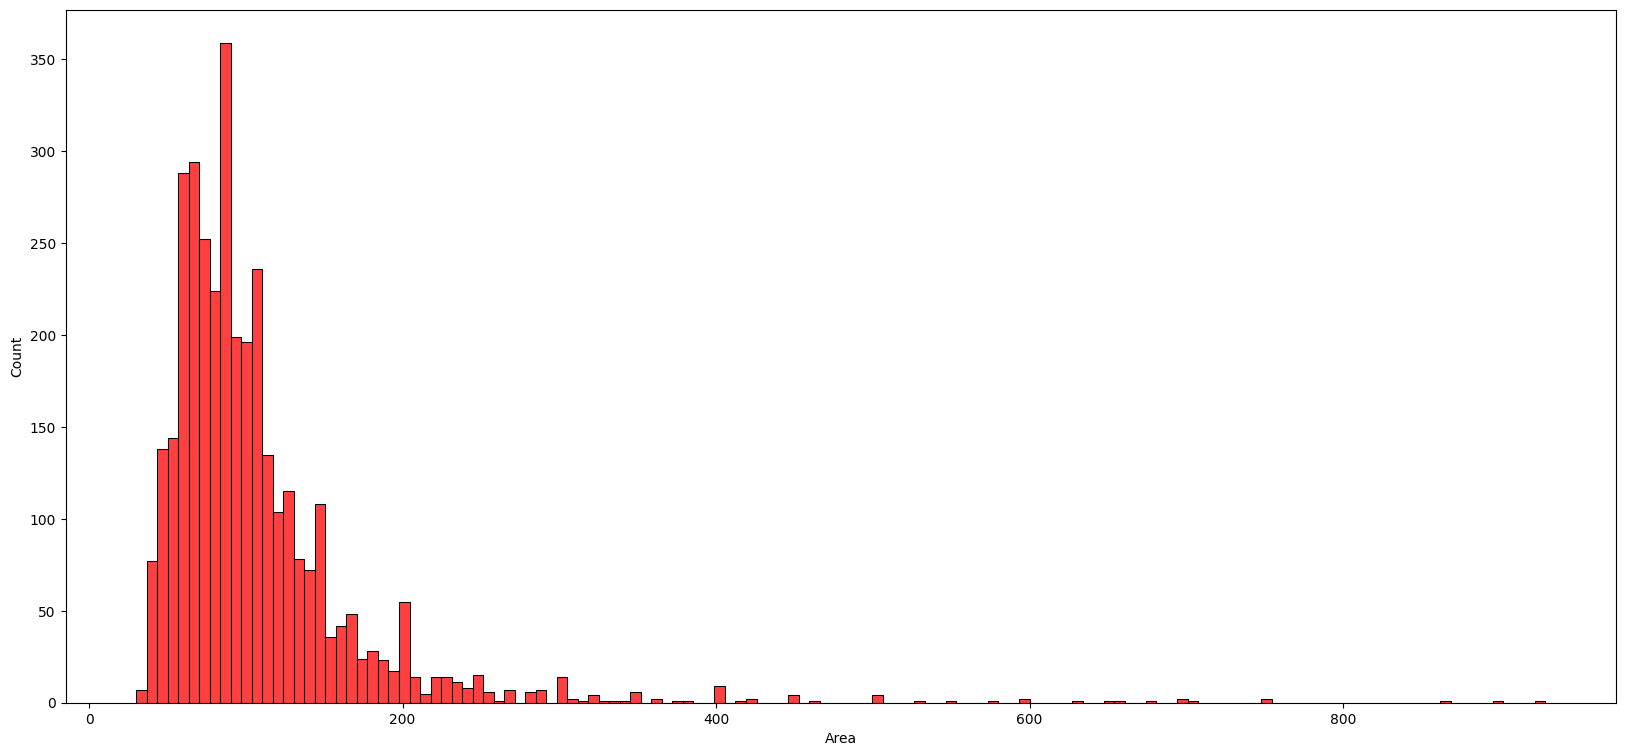

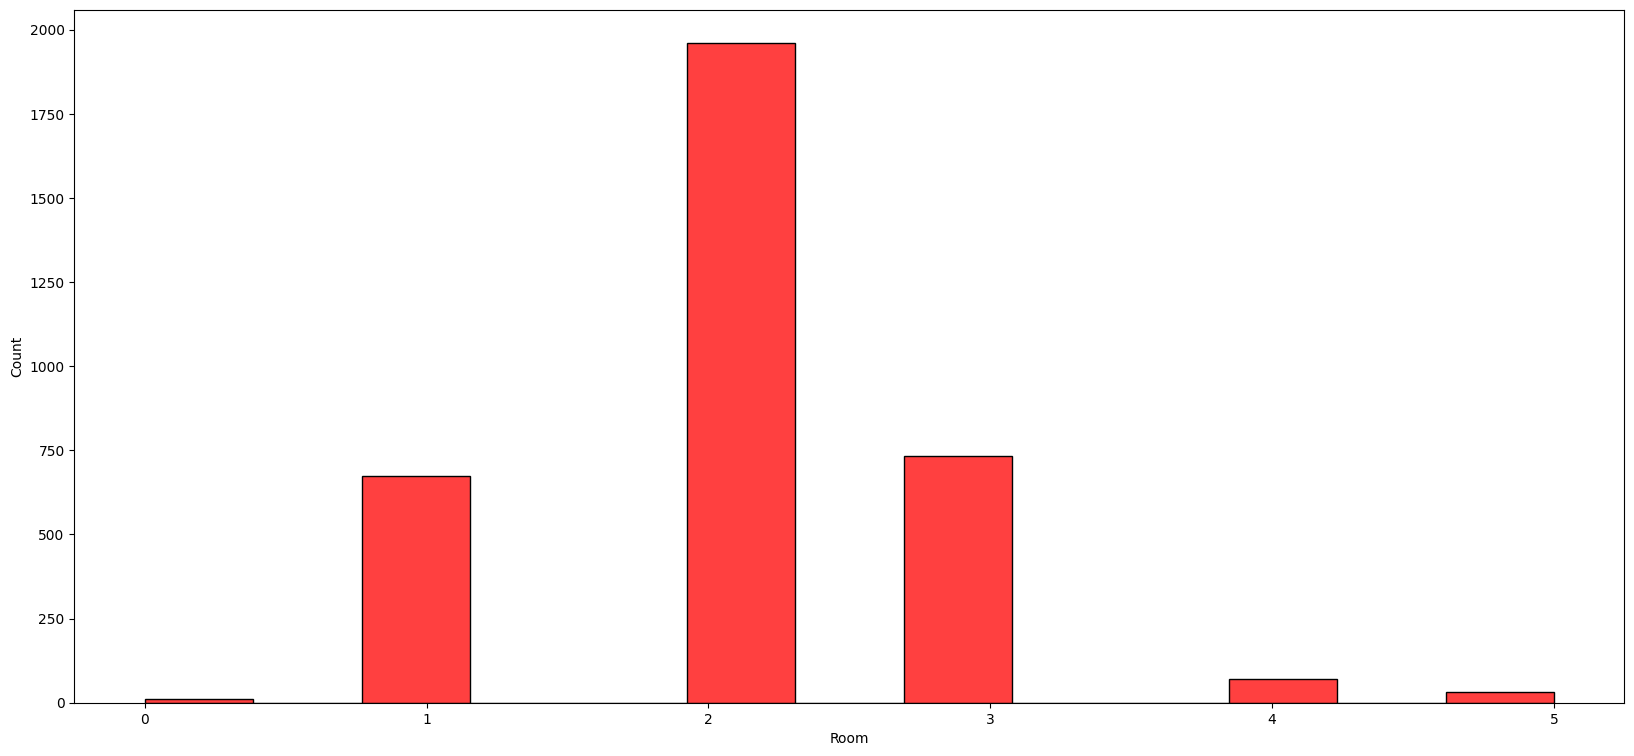

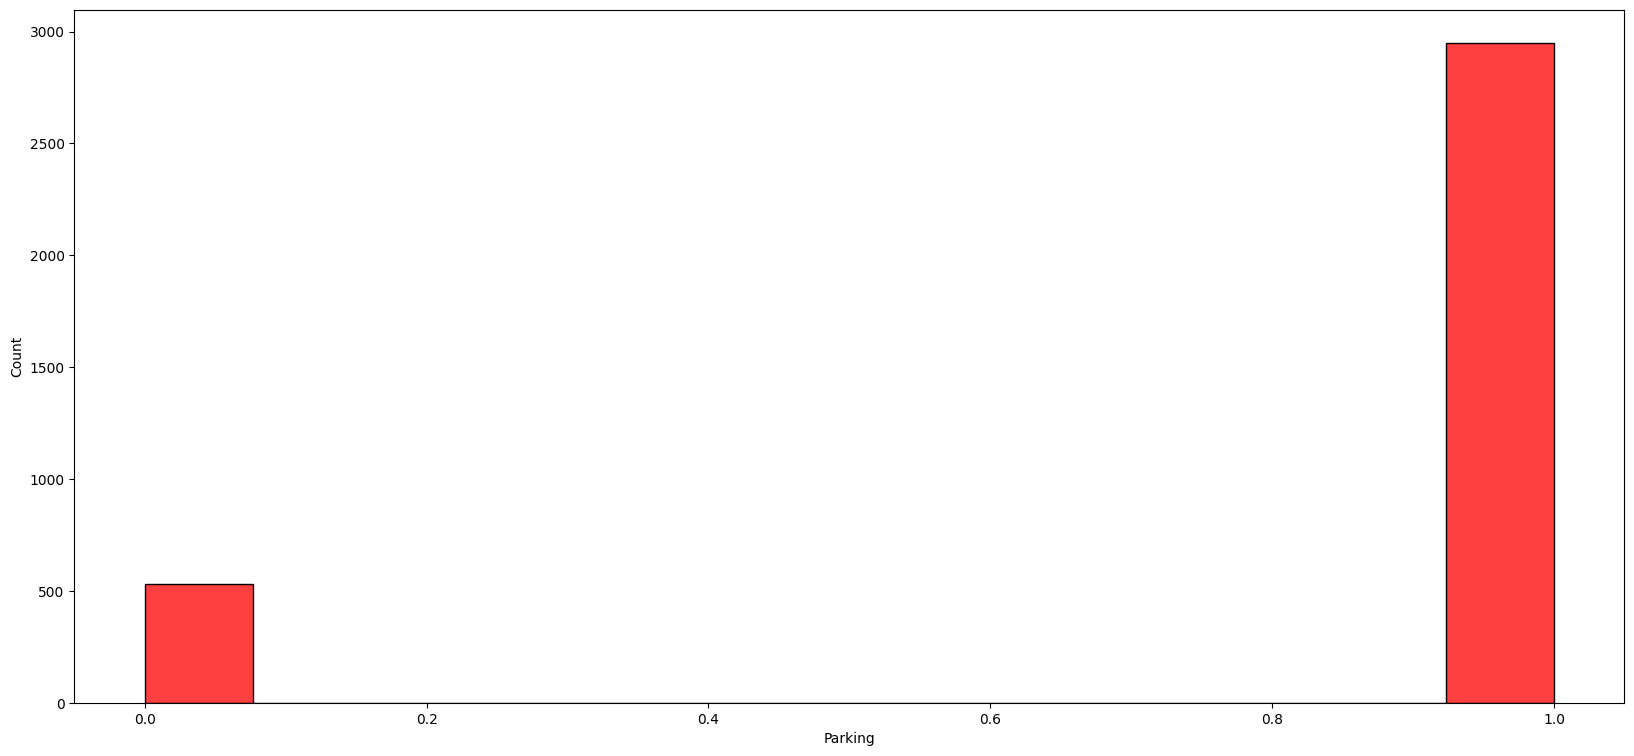

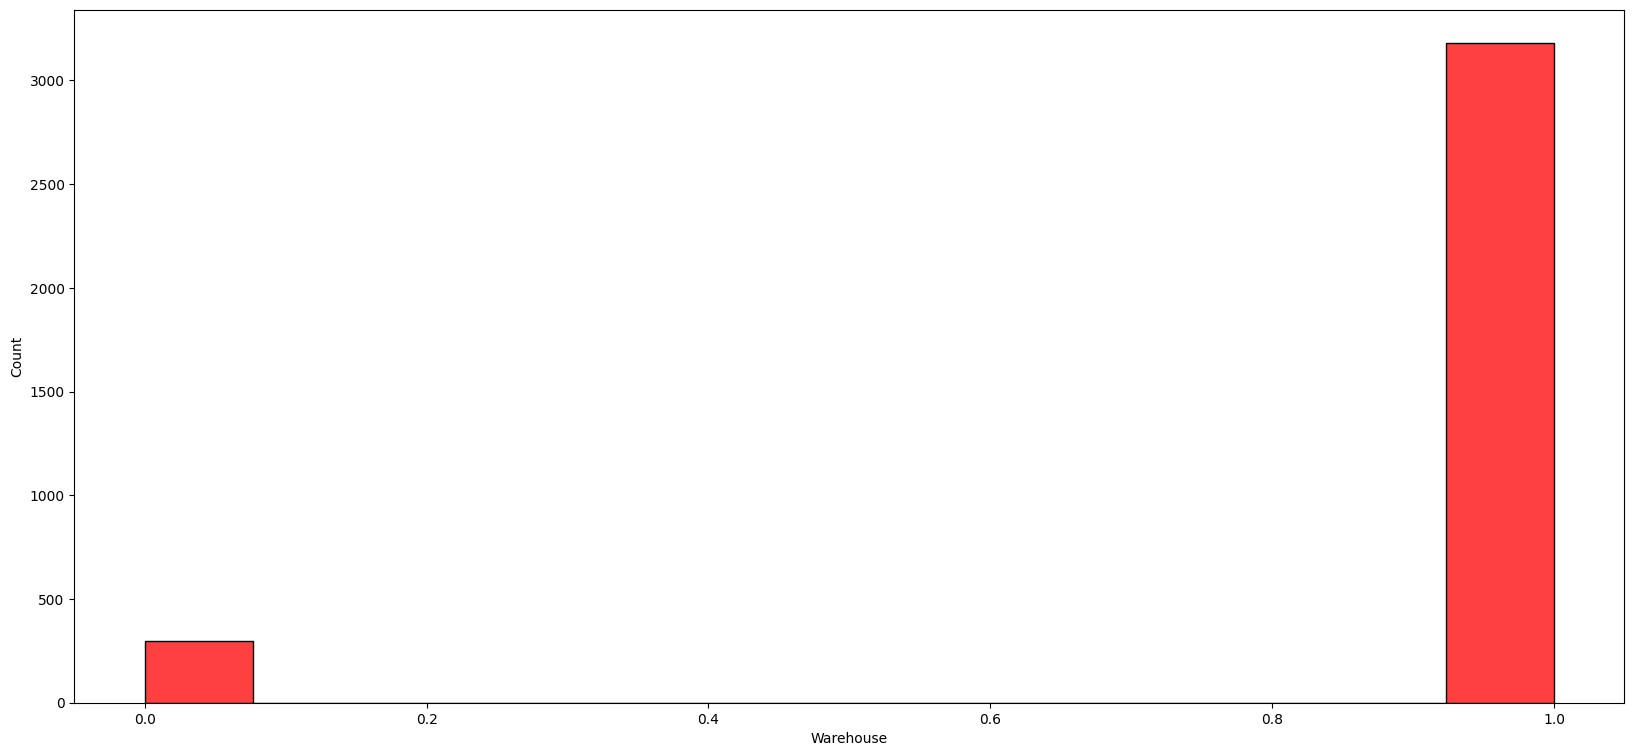

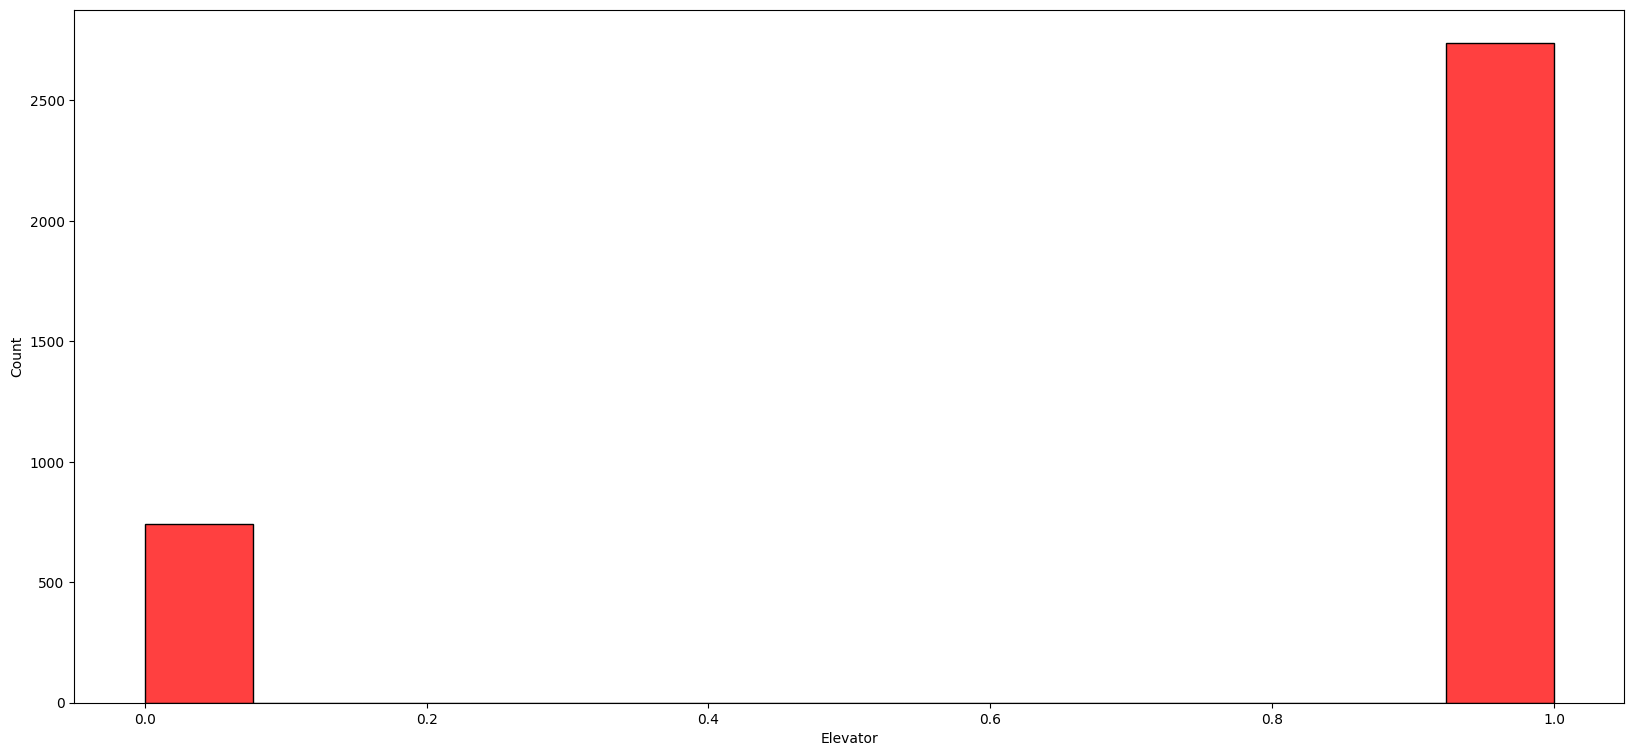

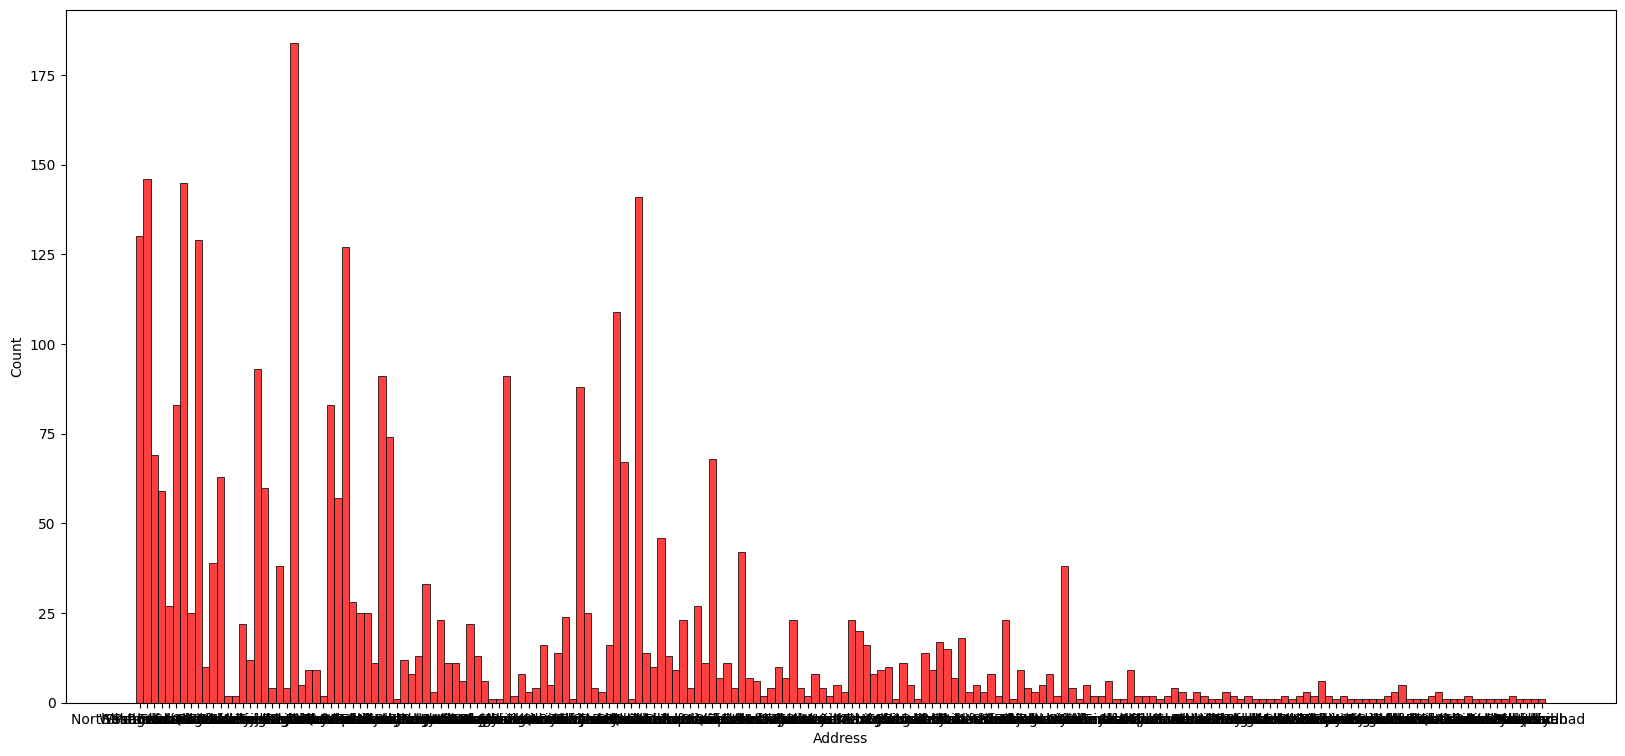

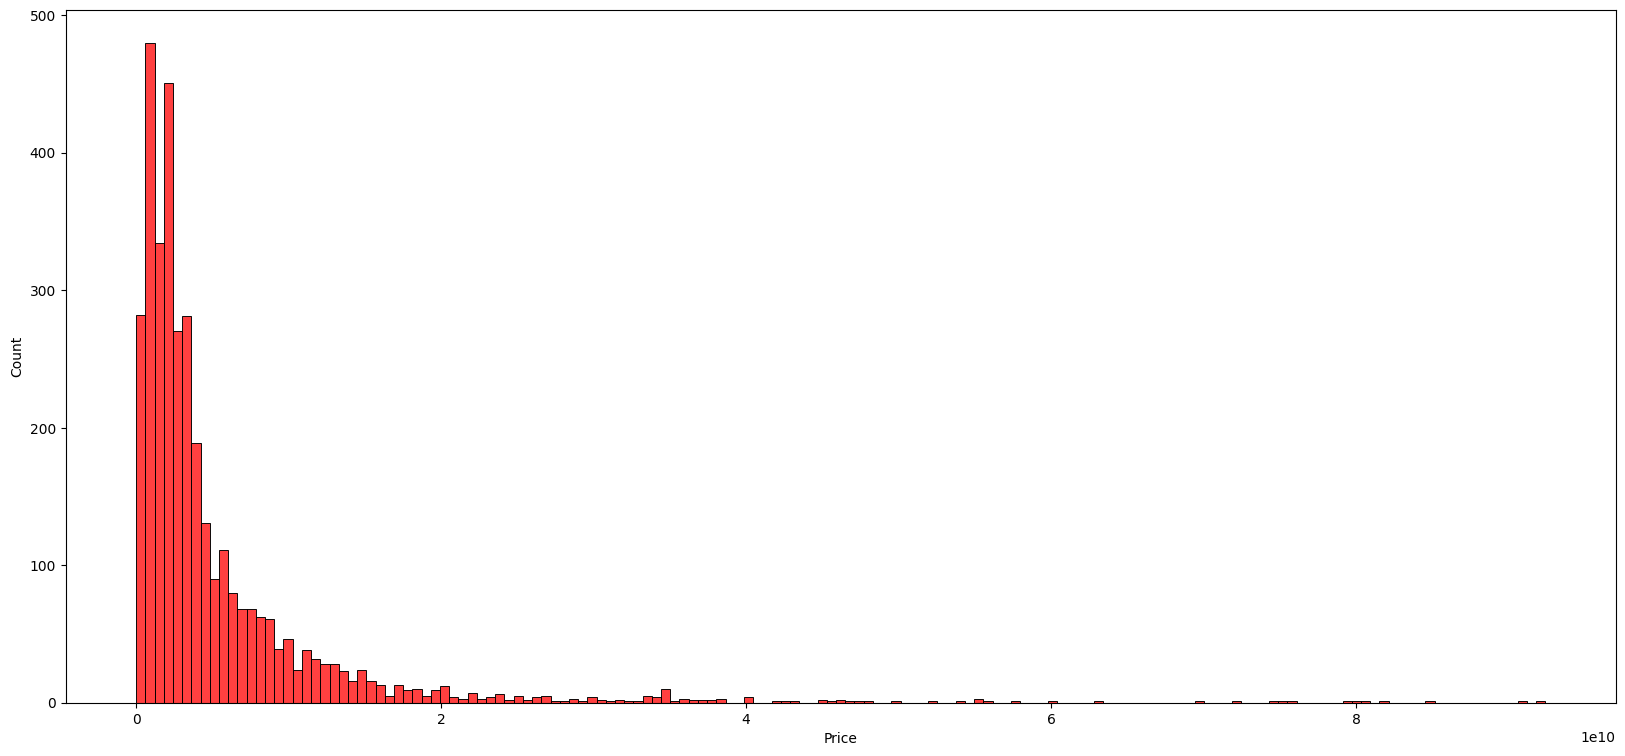

In [19]:
import seaborn as sns
for col in data.columns:
    plt.figure(figsize=(20,9))
    sns.histplot(data[col], color="red")
    plt.show()

In [20]:

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(data, columns=['Address'], prefix='Address')




In [21]:
print(df_encoded)

       Area  Room  Parking  Warehouse  Elevator         Price  Address_Abazar  \
0      63.0     1        1          1         1  1.850000e+09               0   
1      60.0     1        1          1         1  1.850000e+09               0   
2      79.0     2        1          1         1  5.500000e+08               0   
3      95.0     2        1          1         1  9.025000e+08               0   
4     123.0     2        1          1         1  7.000000e+09               0   
...     ...   ...      ...        ...       ...           ...             ...   
3474   86.0     2        1          1         1  3.500000e+09               0   
3475   83.0     2        1          1         1  6.800000e+09               0   
3476   75.0     2        0          0         0  3.650000e+08               0   
3477  105.0     2        1          1         1  5.600000e+09               0   
3478   82.0     2        0          1         1  3.600000e+08               0   

      Address_Abbasabad  Ad

In [22]:
#data = pd.concat([data, df_encoded], axis=1)
data=df_encoded

In [23]:
data.head(20)

,Area,Room,Parking,Warehouse,Elevator,Price,Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,2,1,1,1,5.500000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95.0,2,1,1,1,9.025000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123.0,2,1,1,1,7.000000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,70.0,2,1,1,0,2.050000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,87.0,2,1,1,1,6.000000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,59.0,1,1,1,1,2.150000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,54.0,2,1,1,0,4.930000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,71.0,1,1,1,1,2.370000e+09,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
print(data.columns)


Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price',
       'Address_Abazar', 'Address_Abbasabad', 'Address_Absard',
       'Address_Abuzar',
       ...
       'Address_Waterfall', 'Address_West Ferdows Boulevard',
       'Address_West Pars', 'Address_Yaftabad', 'Address_Yakhchiabad',
       'Address_Yousef Abad', 'Address_Zafar', 'Address_Zaferanieh',
       'Address_Zargandeh', 'Address_Zibadasht'],
      dtype='object', length=198)


In [25]:
print(data.head())

    Area  Room  Parking  Warehouse  Elevator         Price  Address_Abazar  \
0   63.0     1        1          1         1  1.850000e+09               0   
1   60.0     1        1          1         1  1.850000e+09               0   
2   79.0     2        1          1         1  5.500000e+08               0   
3   95.0     2        1          1         1  9.025000e+08               0   
4  123.0     2        1          1         1  7.000000e+09               0   

   Address_Abbasabad  Address_Absard  Address_Abuzar  ...  Address_Waterfall  \
0                  0               0               0  ...                  0   
1                  0               0               0  ...                  0   
2                  0               0               0  ...                  0   
3                  0               0               0  ...                  0   
4                  0               0               0  ...                  0   

   Address_West Ferdows Boulevard  Address_West Pa

In [26]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,1,1,1,1,1.850000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,2,1,1,1,5.500000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95.0,2,1,1,1,9.025000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123.0,2,1,1,1,7.000000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(data['Area'])
lower_price, upper_price = lower_upper(data['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -7.50
Upper limit for area: 196.50
Lower limit for price: -5,454,375,000.0
Upper limit for price: 12,872,625,000.0


In [28]:
areaOutliers = np.where(data['Area']>upper_area)
priceOutliers = np.where(data['Price']>upper_price)
totalOutliers = np.union1d(areaOutliers, priceOutliers)
print(f"this dataset have {len(totalOutliers)} outliers\n",f"before {data.shape}")

data.drop(totalOutliers, axis=0, inplace =True)
data.reset_index(drop=True,inplace=True)
print(f"after drop outliers{data.shape}")

this dataset have 362 outliers
 before (3479, 198)
after drop outliers(3117, 198)


In [29]:
data=(data/data.max())


In [30]:
X = data.drop(data.columns[5], axis=1)

# Create Y with only the column at index 4
Y = data.iloc[:, 5]

In [31]:
print(X)

          Area  Room  Parking  Warehouse  Elevator  Address_Abazar  \
0     0.328125   0.2      1.0        1.0       1.0             0.0   
1     0.312500   0.2      1.0        1.0       1.0             0.0   
2     0.411458   0.4      1.0        1.0       1.0             0.0   
3     0.494792   0.4      1.0        1.0       1.0             0.0   
4     0.640625   0.4      1.0        1.0       1.0             0.0   
...        ...   ...      ...        ...       ...             ...   
3112  0.447917   0.4      1.0        1.0       1.0             0.0   
3113  0.432292   0.4      1.0        1.0       1.0             0.0   
3114  0.390625   0.4      0.0        0.0       0.0             0.0   
3115  0.546875   0.4      1.0        1.0       1.0             0.0   
3116  0.427083   0.4      0.0        1.0       1.0             0.0   

      Address_Abbasabad  Address_Absard  Address_Abuzar  Address_Afsarieh  \
0                   0.0             NaN             0.0               0.0   
1    

In [32]:
print(Y)

0       0.144250
1       0.144250
2       0.042885
3       0.070370
4       0.545809
          ...   
3112    0.272904
3113    0.530214
3114    0.028460
3115    0.436647
3116    0.028070
Name: Price, Length: 3117, dtype: float64


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [34]:
print("X shape:", X_train.shape)
print("y shape:", Y_train.shape)

X shape: (2493, 197)
y shape: (2493,)


In [35]:
X.isnull().sum()

Area                   0
Room                   0
Parking                0
Warehouse              0
Elevator               0
                      ..
Address_Yousef Abad    0
Address_Zafar          0
Address_Zaferanieh     0
Address_Zargandeh      0
Address_Zibadasht      0
Length: 197, dtype: int64

In [39]:
#from sklearn.linear_model import LinearRegression

#regressor = LinearRegression()
#regressor.fit(X, Y)
from sklearn.ensemble import HistGradientBoostingRegressor


regressor = HistGradientBoostingRegressor()
regressor.fit(X, Y)

HistGradientBoostingRegressor()

In [43]:
train_score = regressor.score(X_train, Y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

The Accuracy of training: 82.92 %


In [44]:
test_score = regressor.score(X_test, Y_test)
print(f'The Accuracy of test: {round(test_score*100, 2)} %')

The Accuracy of test: 80.09 %


In [45]:
from sklearn.metrics import r2_score
prediction = regressor.predict(X_test)
accuracy = r2_score(prediction, Y_test)
print(f'Accuracy: {round((accuracy*100),2)}')

Accuracy: 74.65
